In [148]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [149]:
pd.options.mode.chained_assignment = None 

In [150]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [152]:
personality = pd.read_csv('Classification Problem\Personality_Dataset.csv')

In [153]:
personality.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [154]:
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2900 non-null   int64  
 1   Time_spent_Alone           2837 non-null   float64
 2   Stage_fear                 2827 non-null   object 
 3   Social_event_attendance    2838 non-null   float64
 4   Going_outside              2834 non-null   float64
 5   Drained_after_socializing  2848 non-null   object 
 6   Friends_circle_size        2823 non-null   float64
 7   Post_frequency             2835 non-null   float64
 8   Personality                2900 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 204.0+ KB


In [155]:
for x in personality.columns[1:]:
    print(personality[x].value_counts())
    print('\n')

Time_spent_Alone
0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
8.0     180
5.0     180
6.0     150
11.0    140
Name: count, dtype: int64


Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64


Social_event_attendance
2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
10.0     14
Name: count, dtype: int64


Going_outside
0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
Name: count, dtype: int64


Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64


Friends_circle_size
5.0     301
3.0     283
1.0     281
2.0     274
4.0     254
8.0     165
12.0    148
10.0    146
14.0    144
6.0     137
9.0     135
11.0    134
7.0     133
13.0    123
0.0     106
15.0     59
Name: count, dtype: int64


Post_frequency
2.0     481
1.0     455
0.0     451
7.0     236
5.0     212
6.0     210
3.0     208
4.0     195
8.0  

In [156]:
personality['Stage_fear'] = personality['Stage_fear'].map({'Yes': 1, 'No': 0})
personality['Drained_after_socializing'] = personality['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [157]:
personality.shape

(2900, 9)

In [158]:
personality.isna().sum()

Unnamed: 0                    0
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [159]:
personality.duplicated().sum()

np.int64(0)

In [160]:
numerical_cols_with_na = personality.columns[personality.isnull().any()].tolist()

if numerical_cols_with_na:
    for col in numerical_cols_with_na:
        median_val = personality[col].median()
        personality[col].fillna(median_val, inplace=True)
        print(f"'{col}' median: {median_val}")

print(personality.isnull().sum())


'Time_spent_Alone' median: 4.0
'Stage_fear' median: 0.0
'Social_event_attendance' median: 3.0
'Going_outside' median: 3.0
'Drained_after_socializing' median: 0.0
'Friends_circle_size' median: 5.0
'Post_frequency' median: 3.0
Unnamed: 0                   0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


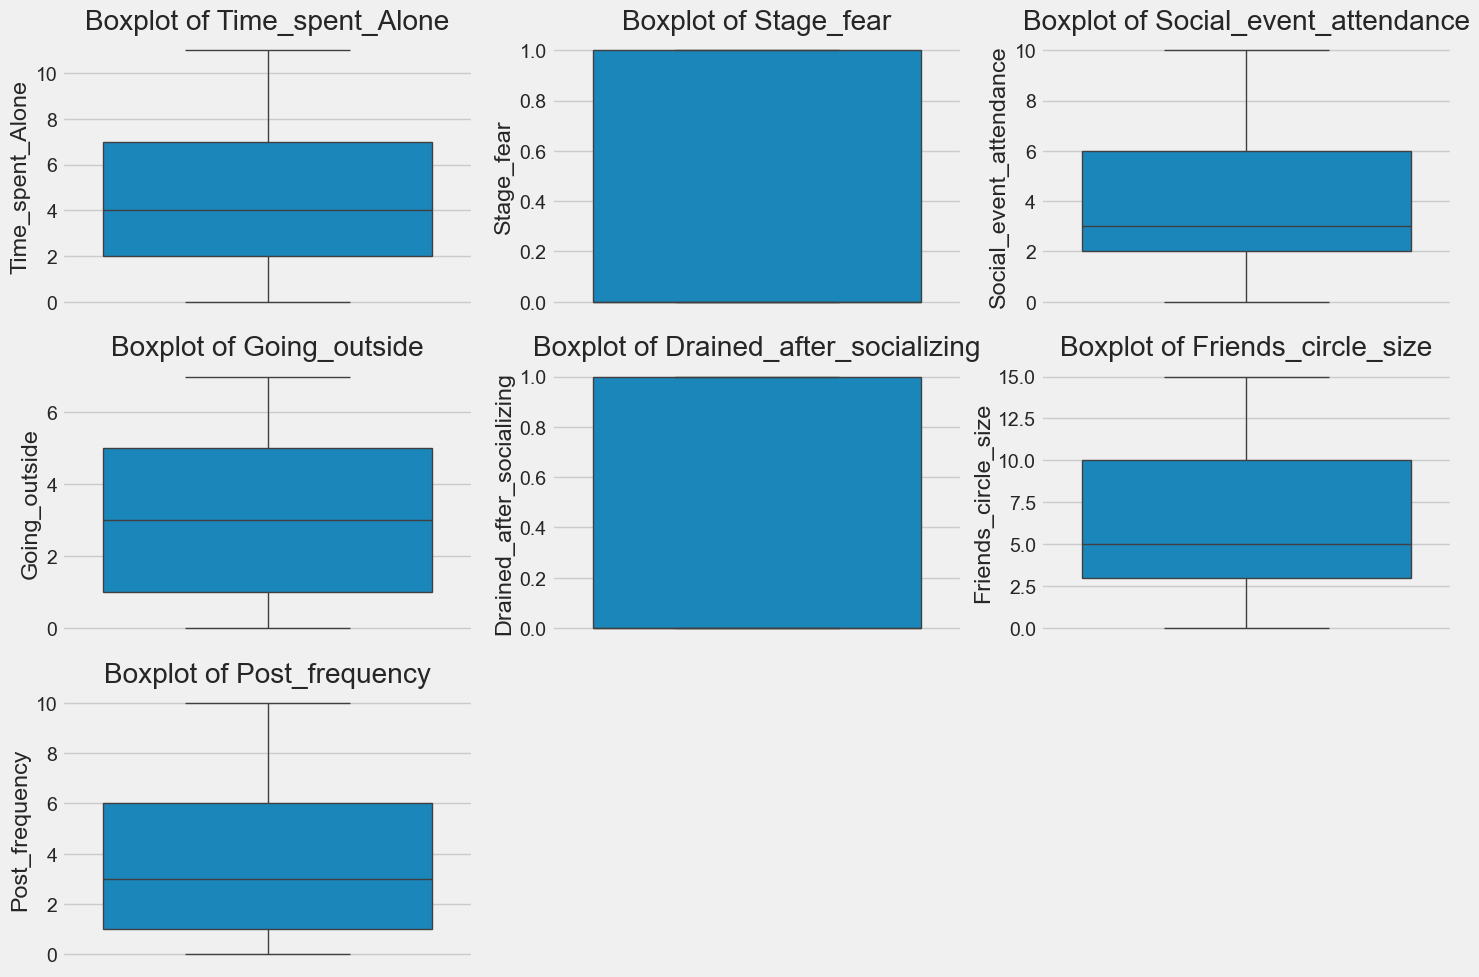

In [161]:
numerical_features = personality.select_dtypes(include=np.number).columns.tolist()
fig,ax = plt.subplots(3,3,figsize = (15,10))
ax = ax.ravel()
for i, feature in enumerate(numerical_features[1:]):
    sns.boxplot(personality[feature], ax=ax[i])
    ax[i].set_title(f'Boxplot of {feature}')

ax[-1].remove()
ax[-2].remove()
plt.tight_layout()
plt.show()

In [162]:
y = personality['Personality']
X = personality.drop('Personality', axis=1)

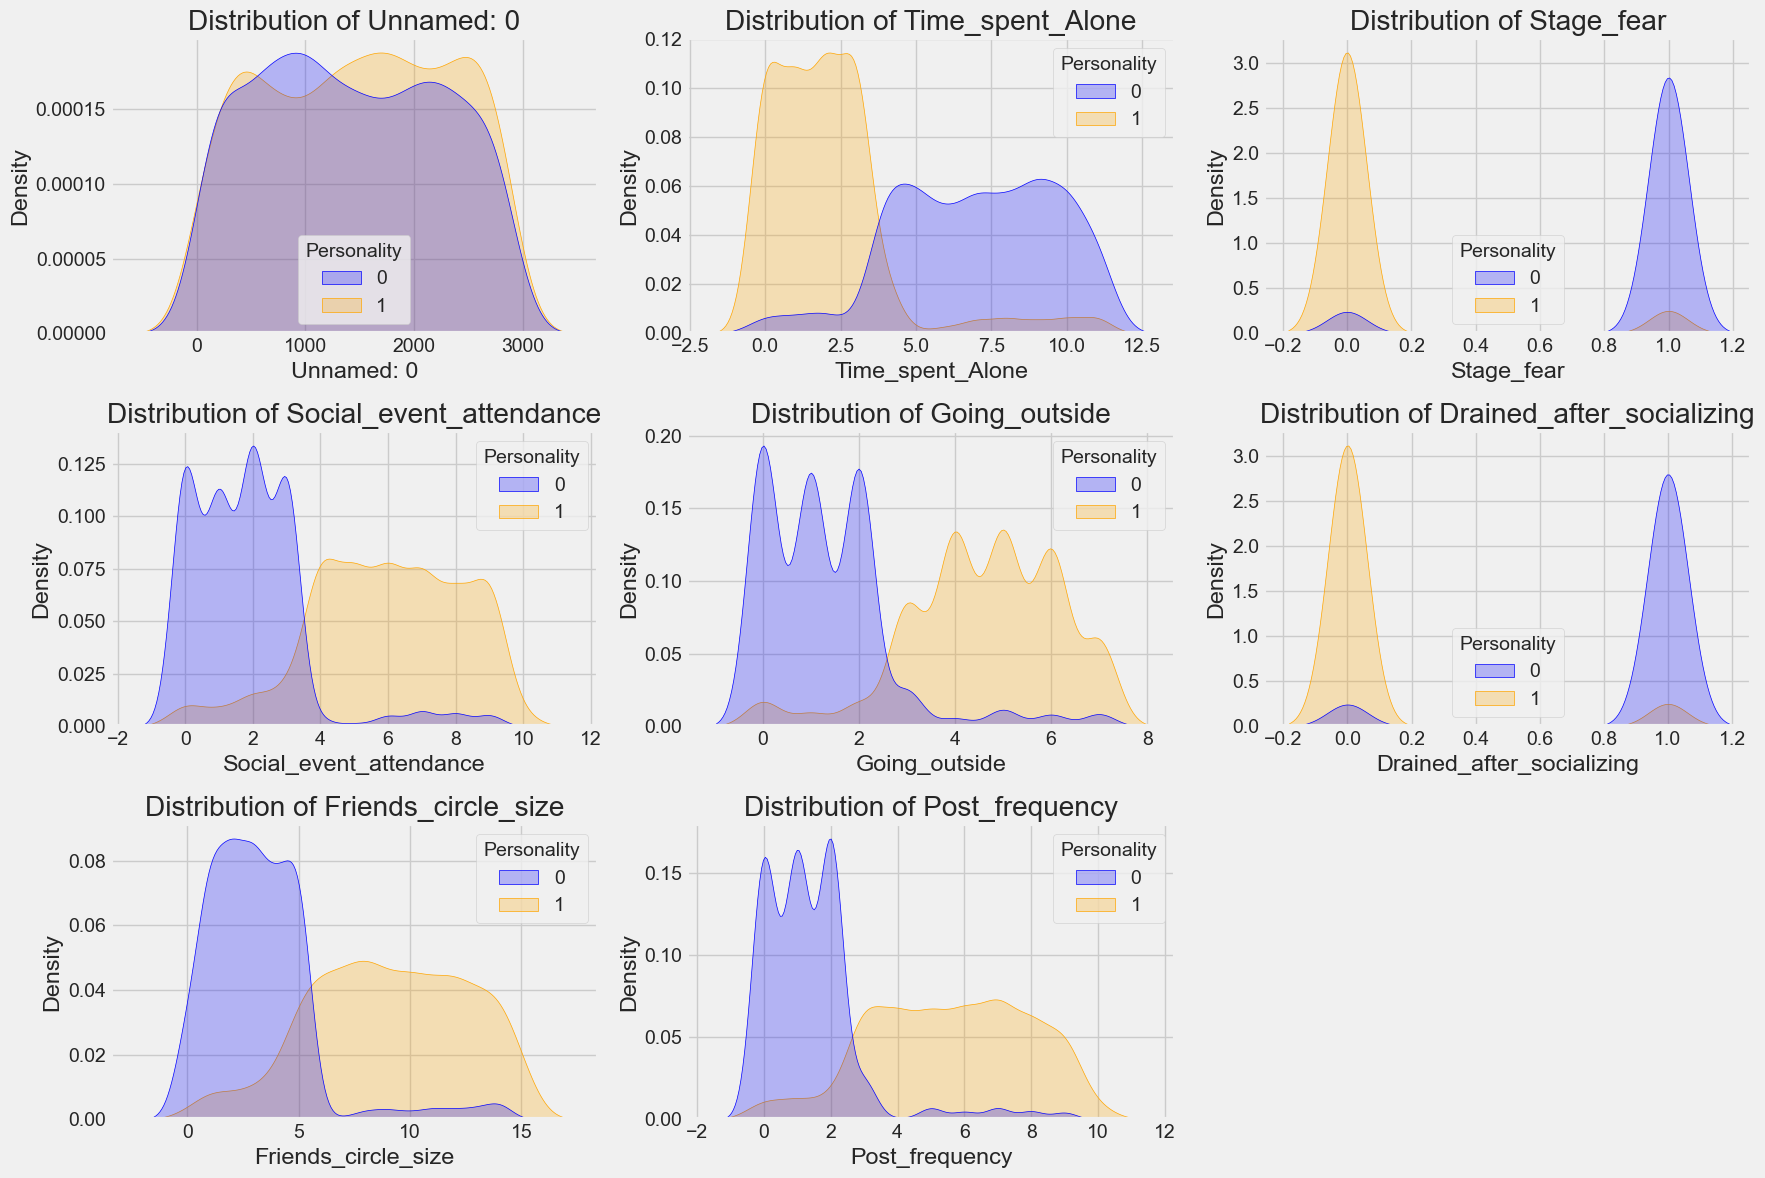

In [163]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    # Using kdeplot to see the distribution curve
    sns.kdeplot(data=personality, x=col, hue='Personality', fill=True, palette={0: 'blue', 1: 'orange'})
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of All Variables')

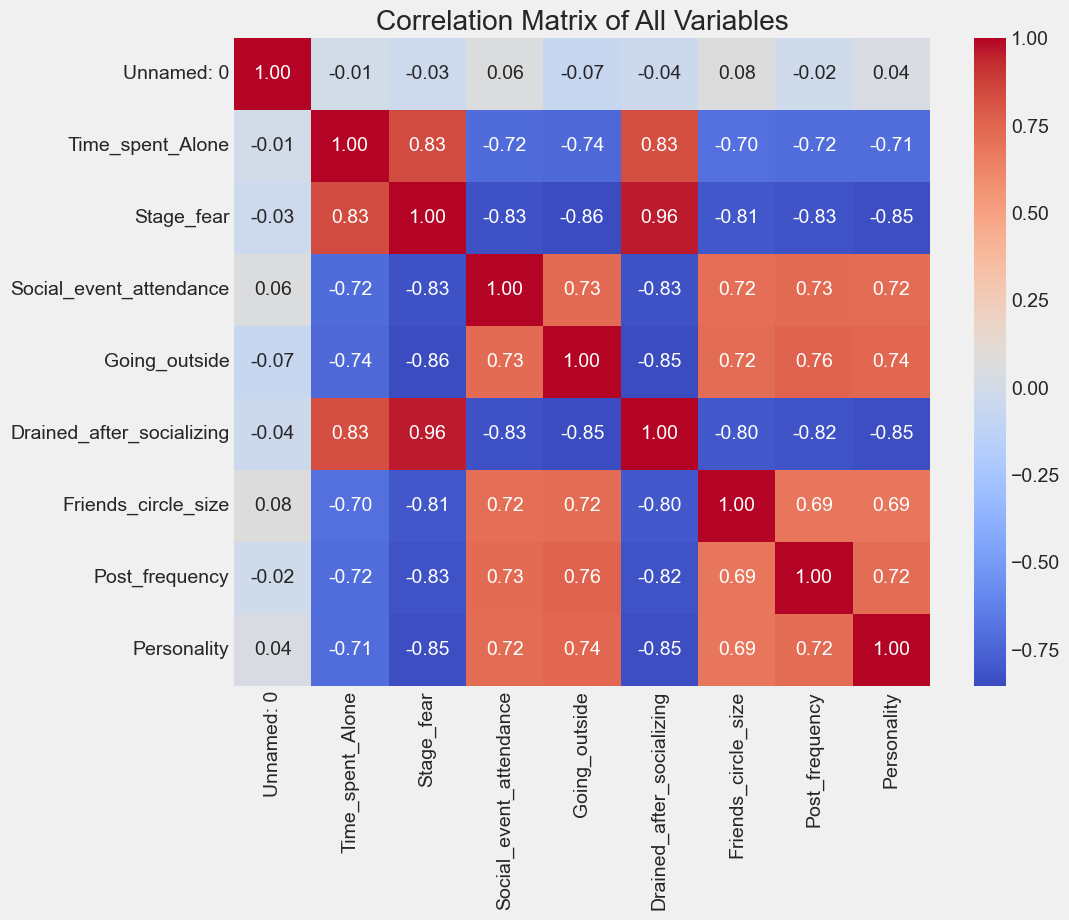

In [164]:

plt.figure(figsize=(10, 8))
sns.heatmap(personality.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Variables')

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [167]:
X_scaled_df['Personality'] = y

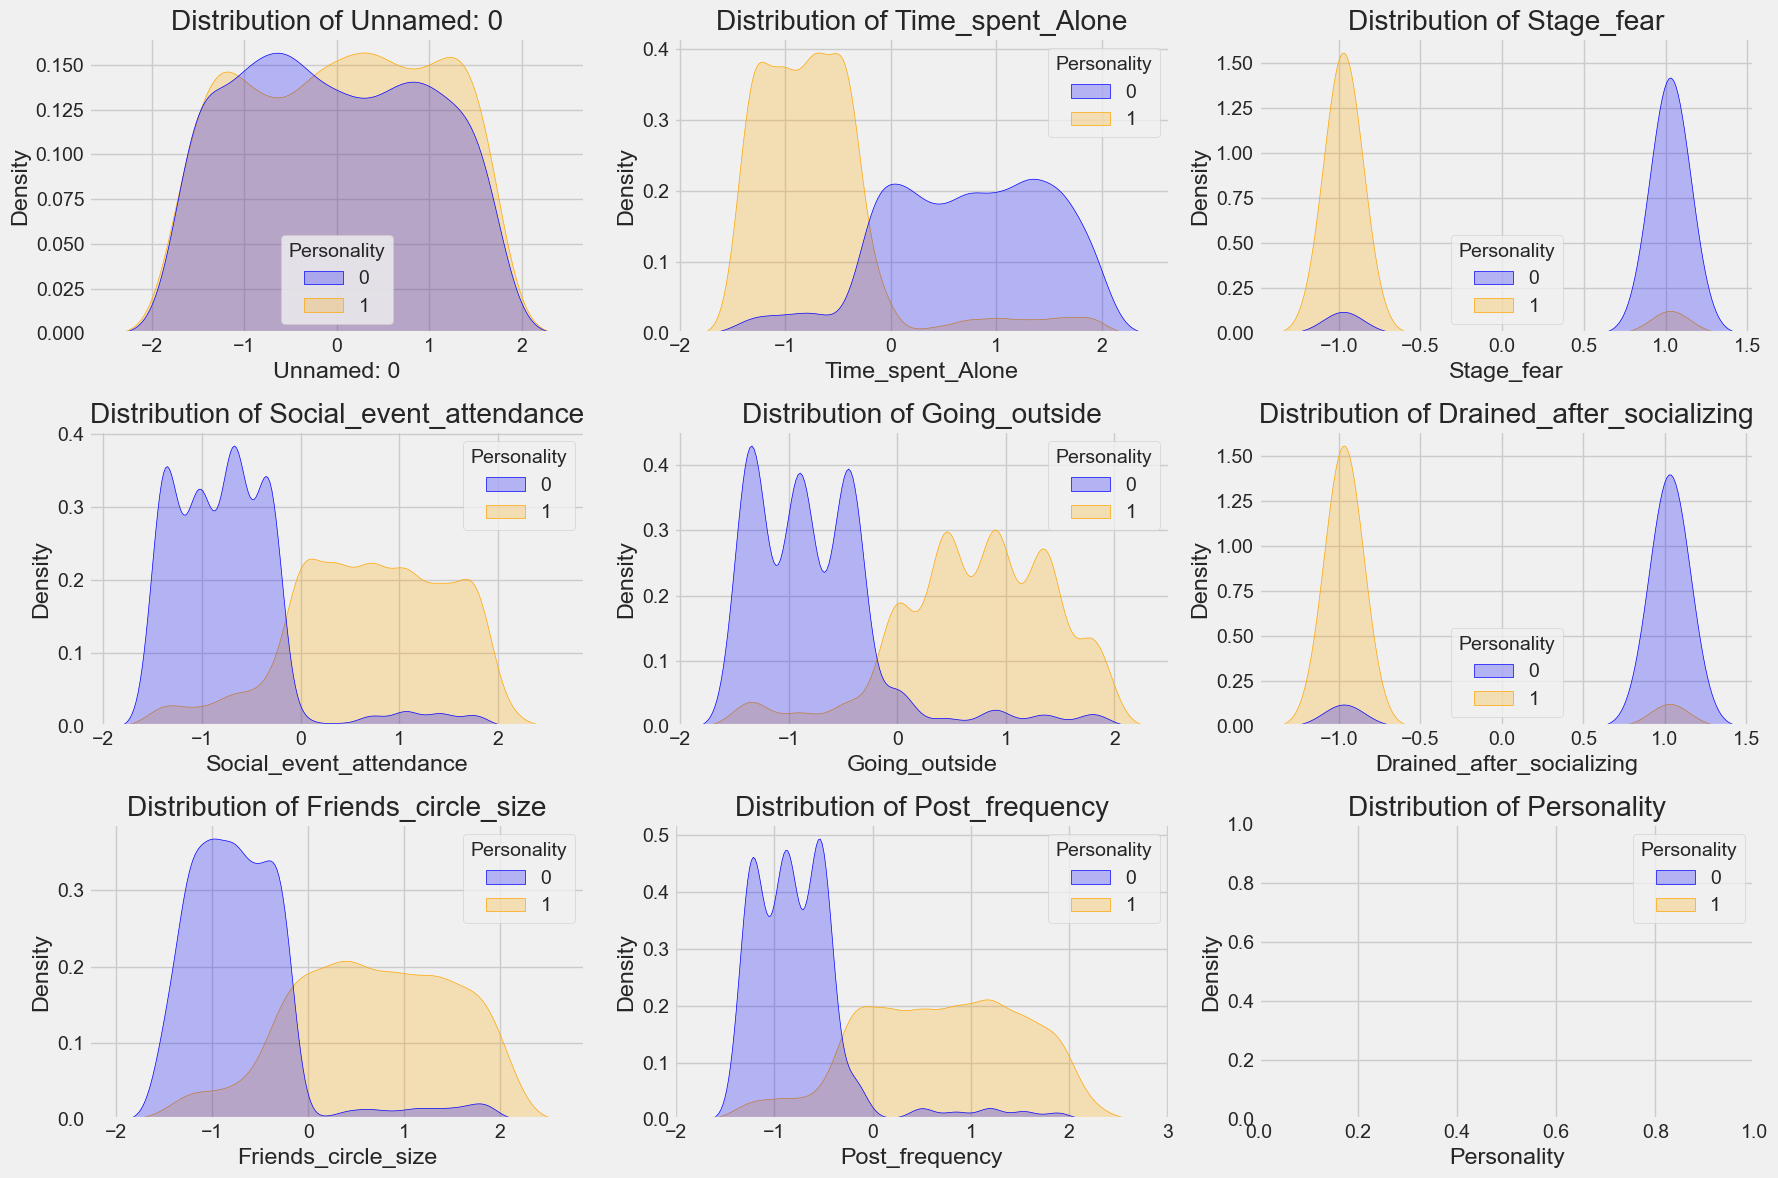

In [168]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=X_scaled_df, x=col, hue='Personality', fill=True, palette={0: 'blue', 1: 'orange'})
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [169]:
X_scaled_df.drop('Personality',axis=1,inplace=True)

In [170]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
print(vif)

                     feature        VIF
0                 Unnamed: 0   1.066723
1           Time_spent_Alone   3.473869
2                 Stage_fear  14.672994
3    Social_event_attendance   3.472913
4              Going_outside   4.176852
5  Drained_after_socializing  13.968808
6        Friends_circle_size   3.053636
7             Post_frequency   3.379425


In [171]:
X_scaled_df.drop('Unnamed: 0',axis=1,inplace=True)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)


In [173]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [174]:
y_pred = model.predict(X_test)

In [175]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.9121


In [176]:
train_accuracy = model.score(X_train, y_train)
print(f"Accuracy on the training set: {train_accuracy:.4f}")

Accuracy on the training set: 0.9272


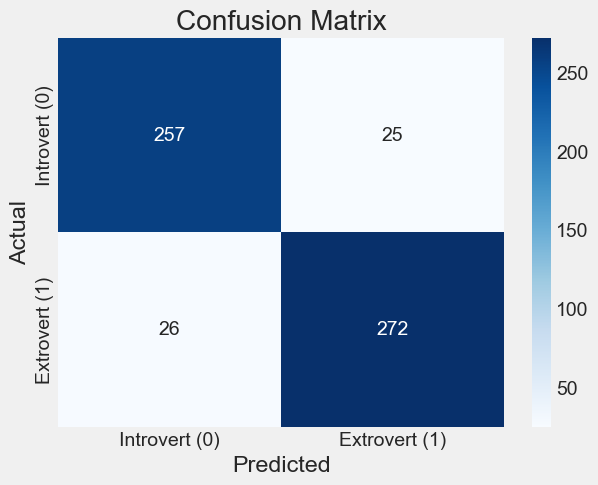

In [177]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert (0)', 'Extrovert (1)'], yticklabels=['Introvert (0)', 'Extrovert (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [178]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Introvert (0)', 'Extrovert (1)']))
print("-" * 50)


Classification Report:
               precision    recall  f1-score   support

Introvert (0)       0.91      0.91      0.91       282
Extrovert (1)       0.92      0.91      0.91       298

     accuracy                           0.91       580
    macro avg       0.91      0.91      0.91       580
 weighted avg       0.91      0.91      0.91       580

--------------------------------------------------
